# Assignment 4: Linear Regression

이번 과제부터, 여러분은 파이썬을 사용하여 데이터 분석과 머신러닝과 관련된 알고리즘을 구현할 것입니다.

이번 4번째 과제의 목표는 다음과 같습니다.
- 파이썬을 사용하여 데이터 처리
- 파이썬을 사용하여 그래프 그리기
- Linear regression 구현


## Part 1: 파이썬을 사용한 데이터 처리

데이터 분석의 시작은 외부에서 생성된 데이터를 우리가 사용할 프레임워크, 파이썬에 불러오는 것입니다. 데이터를 사용하는데 앞서 후에 데이터를 사용하기 쉽게 생성 단계에서 정규화된 포멧으로 데이터를 저장하는 것이 좋습니다. 임의로 데이터를 생성한다면, 후 처리 과정에서 데이터를 읽기 위해 별도의 작업이 필요하게 됩니다.

데이터를 저장하기 위해 일반적으로 사용하는 포멧은 다음과 같습니다.

|type|name| desc |
|:---|:---:| :---: |
| text | CSV | comma-separated value |
| text | JSON | Javascript object notation |
| binary | HDF5 | Hierarchical data format |
| binary | excel | excel format |

이외에도 다양한 포멧들이 있습니다. 다양한 포멧들에 대해 궁금하다면 [여기](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html)를 참조하세요.

이번 과제에서는 CSV(comma-seperated value) 포멧을 사용할 것입니다. CSV 포멧은 텍스트 형태로 데이터를 저장할 때 흔히 사용합니다. CSV 데이터는 표 데이터를 텍스트로 표현한 것이며, 표의 각 행과 열은 각각 줄바꿈과 ','로 표현합니다.
일반적으로 이러한 표 데이터에서 각 행은 관측한 하나의 이벤트를 나타내며, 각 열은 관측 대상의 여러 특성을 의미합니다.

| Name | Codename |	Cores |	Clock |	Socket | Process | L3 Cache | TDP | Released |
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| Ryzen 5 5600X | Vermeer | 6 / 12 | 3.7 — 4.6 GHz | Socket AM4 | 7 nm | 32MB | 65 W | Nov 5th, 2020 |
| Ryzen 7 5800X | Vermeer | 8 / 16 | 3.8 — 4.7 GHz | Socket AM4 | 7 nm | 32MB | 105 W | Nov 5th, 2020 |
| Ryzen 9 5900X | Vermeer | 12 / 24 | 3.7 — 4.8 GHz | Socket AM4 | 7 nm | 64MB | 105 W | Nov 5th, 2020 |
| Ryzen 9 5950X | Vermeer | 16 / 32 | 3.4 — 4.9 GHz | Socket AM4 | 7 nm | 64MB | 105 W | Nov 5th, 2020 |

위의 표 데이터를 CSV로 표현하면 다음과 같습니다.
```
Name,Codename,Cores,Clock,Socket,Process,L3 Cache,TDP,Released
Ryzen 5 5600X,Vermeer,6 / 12,3.7 — 4.6 GHz,Socket AM4,7 nm,32MB,65 W,Nov 5th, 2020
Ryzen 7 5800X,Vermeer,8 / 16,3.8 — 4.7 GHz,Socket AM4,7 nm,32MB,105 W,Nov 5th, 2020
Ryzen 9 5900X,Vermeer,12 / 24,3.7 — 4.8 GHz,Socket AM4,7 nm,64MB,105 W,Nov 5th, 2020
Ryzen 9 5950X,Vermeer,16 / 32,3.4 — 4.9 GHz,Socket AM4,7 nm,64MB,105 W,Nov 5th, 2020
```

이제 주어진 csv 파일을 읽는 방법을 배워봅시다.
python으로 csv 파일을 다루는 방법은, 텍스트 파일을 읽어서 파싱하는 방법부터, numpy, pandas와 같은 라이브러리를 사용하는 방법 등 다양하게 있습니다. 여기에서는 numpy를 사용하여 파일을 읽는 방법을 다루겠습니다.

다음은 numpy에서 파일을 다루기 위한 함수입니다. _\*txt_ 함수명이 _txt_ 로 끝나는 함수들은 텍스트 파일을 다루기 위한 함수입니다.
- np.save(filename, array)
- np.load(filename)
- np.savetxt(filename, array)
- np.loadtxt(filename)

np.savetxt() 함수를 사용하여 csv 파일을 만들기 위해서는 delimiter인자를 ','로 변형해야 합니다.

```python
import numpy as np
a = np.array([[1, 2],
             [3, 4]])
np.savetxt('test_array.csv', a, delimiter=',')
```

## Question 1
다음은 위의 test_array.csv 파일을 생성하기 위한 코드입니다. 저장한 test_array.csv 파일의 데이터를 불러와 변수 b에 저장하세요.
np.loadtxt에 대한 도움말은 np.loadtxt?로 확인할 수 있습니다.

In [260]:
import numpy as np
a = np.array([[1, 2],
             [3, 4]])
np.savetxt('test_array.csv', a, delimiter=',')

# Implement a code to load "test_array.csv" to varaible 'b'
# Put some code here
b = np.loadtxt('test_array.csv', delimiter=',')
print(b)

[[1. 2.]
 [3. 4.]]


## Question 2

과제의 data폴더에는 ex1data.txt파일이 있습니다. ex1data.txt 파일을 불러와 *train_data* 변수에 저장하세요.

In [261]:
train_data = np.loadtxt('ex1data1.txt', delimiter=',')# Put some code here

## Part 2: 그래프 그리기

모델 만들기에 앞서 데이터의 경향성을 파악하는 것이 필요합니다. 데이터 간의 관계를 알고 있다면, 그에 따른 적합한 모델을 선택할 수 있습니다.
데이터의 경향성을 분석하기 위한 일차적 방법은 데이터를 그래프고 그려보는 것입니다. 파이썬을 활용하여 그래프를 그릴 때는 matplotlib이라는 라이브러리를 사용합니다.

**matplotlib**은 데이터를 차트나 플롯으로 표현해주는 데이터 시각화 라이브러리로 John D. Hunter에 의해 처음 개발되었습니다. matplotlib 라이브러리를 사용하여 막대그래프(barchart) 같은 단순한 그래프부터 논문이나 책에 들어갈 높은 수준의 그래프를 만들 수 있습니다.

<img src="figures/plot1.png">


**Question 2**에서 *train_data*를 불러왔습니다. *train_data*의 데이터는 도시의 인구 수에 따른 푸드트럭의 매출을 나타내며, 각 열은 <인구 수, 매출>을 나타냅니다. *train_data*를 다음과 같이 그래프로 그려봅시다.

<img src="figures/plot2.png">

matplotlib을 사용하기 위해서는 우선 아래와 같이 matplotlib 패키지를 불러와야 합니다.
```python
    import matplotlib
    import matplotlib.pyplot as plt # 그래프 그릴 때 사용할 패키지 파일 plt로 별칭을 달아 사용
```
위의 패키지를 포함하는 코드는 matplotlib 사용에 있어 관용구 같이 사용되며, 대부분의 matplotlib을 사용한 코드에서 볼 수 있습니다. 그래프를 쉽게 그리기 위한 다양한 함수 들을 제공하는 모듈로 plt라는 이름으로 사용합니다.

위와 같은 그래프를 scatter 차트라고 부르며, matplotlib에서 해당 그래프는 plt.scatter 함수를 사용하여 그릴 수 있습니다.
아래의 코드를 참조하세요.

```python
    x = train_data[:, 0] # 인구수
    y = train_data[:, 1] # 매출
    plt.scatter(x, y, marker='x')  # Scatter 차트, 첫번째 인자는 x축에 해당하는 값을 의미, y축에 해당하는 값을 의미
                                   # marker는 데이터를 차트에서 X로 표현
    plt.ylabel('Profit in $10,000s') # y축 레이블 설정
    plt.xlabel('Population of City in 10,000s') # x축 레이블 설정
    plt.show()
```

## Question 3

x, y값을 입력받아 위의 그래프를 그리는 함수를 완성하시오.

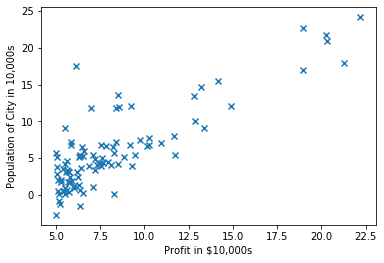

In [262]:
import matplotlib
import matplotlib.pyplot as plt

def plot_data(x, y, x_title="", y_title=""):
    # Put some code here
    plt.scatter(x, y, marker='x')    
    plt.ylabel(x_title)
    plt.xlabel(y_title)
    plt.show()
    
x = train_data[:, 0]
y = train_data[:, 1]
plot_data(x, y, "Population of City in 10,000s", "Profit in $10,000s")

## Part 3: Linear Regression
위의 Part 2에서 *train_data*의 데이터를 살펴 보았습니다. 
그래프를 확인해보면 인구 수와 매출에 따라 선형적 관계가 있다는 것을 눈치챌 수 있습니다.

인구 수에 따른 매출을 예측하기 위해 Linear Regression을 적용하여 예측 모델을 만들어 봅시다.

*train_data*의 feature는 인구 수, 하나입니다. 따라서 Linear Regression 모델은 다음과 같습니다.

$$H_\theta(x) = \theta_0 + \theta_1x $$

이번 과제에서는 초기 theta를 0으로 하여 시작하겠습니다.
이후 구현에 필요한 입력 데이터 X, 결과 y는 아래의 코드에 정의되어 있습니다.
np.dot 함수를 사용하여 모델 계산 하는 것과 그래프 그리는 함수를 보시고, 이후 문제에 변형하여 사용해보세요.

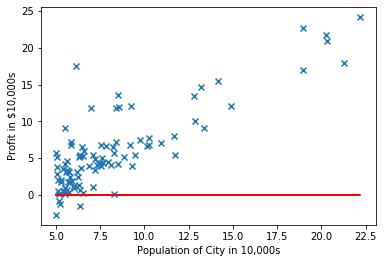

In [274]:
# Plotting header
import matplotlib
import matplotlib.pyplot as plt

# 이 코드는 변수를 초기화한 코드 입니다
theta = np.zeros((2,1))
x = train_data[:, 0, np.newaxis]
y = train_data[:, 1, np.newaxis]

# insert x_0 column to x
x_0 = np.ones((x.shape[0], 1))
X = np.concatenate((x_0, x), axis=1)

plt.scatter(x, y, marker='x')  # Scatter 차트, 첫번째 인자는 x축에 해당하는 값을 의미, y축에 해당하는 값을 의미
                            # marker는 데이터를 차트에서 X로 표현
plt.plot(x, np.dot(X, theta), 'r')
plt.ylabel('Profit in $10,000s') # y축 레이블 설정
plt.xlabel('Population of City in 10,000s') # x축 레이블 설정
plt.show()

### 3.1 Cost Function

만들고자 하는 모델의 정확성을 파악하기 위해서는 모델의 실제 예측값과 실제값과의 차이, 에러를 알아야 합니다.
예측값과 실제값과의 차이를 정의하는 방법은 다양한데, 그 중에서 많이 사용하는 euclidian distance (L2 norm)를 일반적으로 사용합니다.

Euclidian distance $||x - y||_2 = \sqrt{x - y)^2}$

모델 $H_\theta(x)$의 cost function $J(\theta)$는 각 데이터 셋에 모델 에러의 평균으로 정의합니다.
계산의 편의성을 위해, euclidian distance 대신 eulcidian distance의 제곱을 사용하였고, 미분 계산의 편의성을 위해 1/2를 곱하여 정의합니다.

$$J(\theta) = {1 \over 2m} \sum_{i=1}^m(H_\theta(x^{(i)}) - y^{(i)})^2$$


## Question 4. Cost function을 정의하세요.

In [275]:
def cost_function(theta, x, y):
    # Implement cost function
    # You need to return 'scalar value' as result, not array e.g.) 123
    m = x.shape[0]
    cost = 1 / (2 * m) * np.sum(np.power((np.dot(x, theta) - y), 2))
    return cost

cost_function(theta, X, y)

32.072733877455676

### 3.2 Gradient Descent

모델의 파라미터 $\theta$를 최적화하기 위해서 Gradient descent 알고리즘을 사용해봅시다.
파라미터 업데이트 식은 다음과 같습니다.

$$\theta_j := \theta_j - {\alpha \over m}\sum_{i=1}^m(H_\theta(x^{(i)}) - y^{(i)}) x^{(i)}_j$$

입력데이터가 m개일 때, $x^{(i)}, y^{(i)}$는 각각 i번째 데이터의 feature와 결과 label을 의미하며, $\theta_j, x^{(i)}_j$는 j번째 feature에 해당하는 파라미터와 x의 값입니다. $x_0$은 1입니다.


## Question 4. Gradient Descent 알고리즘을 구현하여 theta를 구하세요.

In [276]:
theta = np.zeros((2,1))
def update_func(theta, x, y, alpha=0.01): 
    # Put some code here
    m = x.shape[0]
    new_theta = theta - (alpha / m * np.dot(x.T, (np.dot(x, theta) - y)))
    return new_theta

niter = 1500
for i in range(niter):
    new_theta = update_func(theta, X, y, alpha=0.01)
    theta = new_theta

print(theta)
print('Expected theta [-3.6303, 1.1664]')

[[-3.63029144]
 [ 1.16636235]]
Expected theta [-3.6303, 1.1664]


## Question 5. Graident Descent 알고리즘으로 구한 모델을 아래와 같이 기존 데이터와 함께 그려, 모델이 적합한지 확인하여라

<img src='figures/plot3.png'>

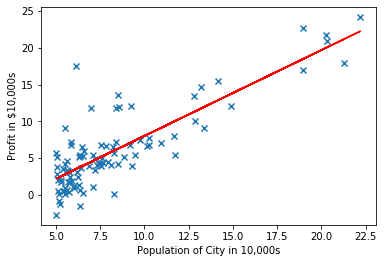

In [277]:
# Put code to draw the above figure
plt.scatter(x, y, marker='x')
plt.plot(x, np.dot(X, theta), 'r')
plt.ylabel('Profit in $10,000s') # y축 레이블 설정
plt.xlabel('Population of City in 10,000s') # x축 레이블 설정
plt.show()

## Question 6. 위의 graident descent 알고리즘을 사용할 때, 매 iteration에서 cost function의 변화를 그래프로 표현하세요.

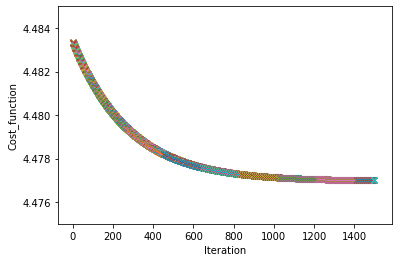

In [278]:
# Put code to draw the above figure
niter = 1500
for i in range(niter):
    new_theta = update_func(theta, X, y, alpha=0.01)
    theta = new_theta
    plt.scatter(i, cost_function(theta, X, y), marker = 'x')

plt.ylabel('Cost_function')
plt.xlabel('Iteration')
plt.ylim([4.475, 4.485])
plt.show()

### 3.3 Cost function plotting

Cost function이 어떠한 모습인지 그래프를 통해 확인해 봅시다. 첫번째 그림은 cost function $J(\theta)$를 3d surface로 표현한 것입니다. $J(\theta)$는 보울 모양으로 global minima를 가지고 있습니다. 이해하기 쉽게 contour 그래프를 그려서 우리가 찾은 $\theta$값이 어디에 위치해 있는지 봅시다. 두번째 그림은 contour로 표현한 $J(\theta)$입니다. X는 학습을 통해 찾은 $\theta$입니다. o은 학습 과정 동안 theta의 위치를 나타냅니다. 매 학습마다, 등고선의 접선 방향으로 조금씩 전진하여 중심의 X로 향하는 것을 확인할 수 있습니다.

그래프 그리는 코드를 확인하고, 어떻게 아래와 같은 그래프를 그리는지 숙지하세요.
- 3D surface: plt.plot_surface
- contour: plt.contour

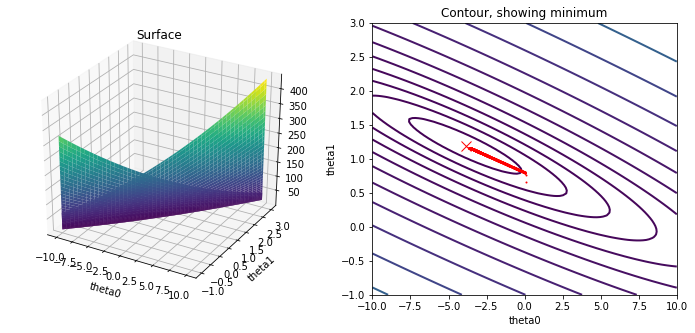

In [279]:
# This code modified from "https://github.com/dibgerge/ml-coursera-python-assignments/blob/master/Exercise1/exercise1.ipynb"
# grid over which we will calculate J
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 3, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        theta_ = np.array([[theta0, theta1]]).T                      
        J_vals[i, j] = cost_function(theta_, X, y)

# plot_surface 함수는 meshgrid를 사용하여, x, y 좌표를 만듭니다.
# 좌표의 기술 방식이 y, x이기 때문에 x, y array index로 배열된 J_vals를 transpose해서 사용합니다.
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5)) # 그림 크기 셋팅
ax = fig.add_subplot(121, projection='3d') # 

ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 30))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'rx', ms=10, lw=2)
plt.title('Contour, showing minimum')

niter = 1500
theta = np.zeros((2,1))
for i in range(niter):
    new_theta = update_func(theta, X, y, alpha=0.01)
    theta = new_theta
    plt.plot(theta[0], theta[1], 'ro', ms=1, lw=1)

## Question 7. Learning rate $\alpha$를 0.1로 하였을 때, cost function의 값이 어떻게 변화하는가? 그에 대한 이유는 무엇인가? 
위의 contour 그래프를 복사하여, learning rate alpha를 0.1로 하였을 때, 1~10 iteration 의 theta값을 표시하고, 질문에 대한 답을 해주세요.

#### -> learning rate(학습률) alpha를 0.1로 변경하게 되면, 학습률이 커져 데이터가 무질서하게 이동하는 것을 확인할    수 있고, 최적의 값에 도달 못하고 발산하는 것을 확인할 수 있다.

[[-3.07909009e+07]
 [-3.06496523e+08]]


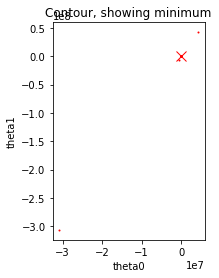

In [280]:
# This code modified from "https://github.com/dibgerge/ml-coursera-python-assignments/blob/master/Exercise1/exercise1.ipynb"
# grid over which we will calculate J
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 3, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        theta_ = np.array([[theta0, theta1]]).T                      
        J_vals[i, j] = cost_function(theta_, X, y)

# plot_surface 함수는 meshgrid를 사용하여, x, y 좌표를 만듭니다.
# 좌표의 기술 방식이 y, x이기 때문에 x, y array index로 배열된 J_vals를 transpose해서 사용합니다.
J_vals = J_vals.T

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 30))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'rx', ms=10, lw=2)
plt.title('Contour, showing minimum')

niter = 10
theta = np.zeros((2,1))
for i in range(niter):
    new_theta = update_func(theta, X, y, alpha=0.1)
    theta = new_theta
    plt.plot(theta[0], theta[1], 'ro', ms=1, lw=1)
print(theta)

### 3.4 Normal Equation

Linear regression 문제는 gradient descent 대신 normal equation을 통해 한번에 최적의 theta를 구할 수 있다. 다음의 normal equation의 식이다.

$$\theta = (X^TX)^{-1}X^Ty$$

## Question 8. Normal equation을 구현하라
Hint
- numpy.linalg.inv? [link](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html)
- How to get transpose of A 
```python
A = np.array([[1,2,3],[4,5,6]])
A_T = A.T
```

In [281]:
from numpy.linalg import inv

def compute_normal_eq(x, y):
    theta = np.dot(inv(np.dot(x.T, x)), np.dot(x.T, y))
    # Need to implement this
    return theta

print(compute_normal_eq(X, y))

[[-3.89578088]
 [ 1.19303364]]


## Question 9. Normal equation과 gradient descent의 실행시간?
normal equation과 graident descent 알고리즘에는 각각의 장단점이 있습니다.

| Gradient Descent | Normal Equation |
| :---: | :---: |
| (-) Learning rate를 골라야 함 | (+) Learning rate 없음 |
| (-) Iteration을 여러번 돌아야 함 | (+) Iteration 없음 |
| (+) Feature가 많은 경우 빠름 | (-) feature가 많은 경우, compute (inverse 계산) 시간이 오래 걸림 |

Feature 를 1, 10, 100, 1000으로 증가시킬 때 normal equation과, gradient descent operation의 연산 시간을 비교하세요.

%time, %timeit함수를 활용하면 jupyter notebook에서 함수의 실행시간을 측정할 수 있습니다.

#### -> Feature의 수가 적을 때는(1, 10, 100) Iteration이 없는 Normal Equation이 Gradient descent보다 빠르게 동작하는 것을 확인할 수 있고, Feature의 수가 많을 때(1000)는  Normal Equation보다 Gradient descent가 더 빠르게 동작하는 것을 확인할 수 있다. 이는 feature가 많아지면 inverse연산에 시간이 오래걸리기 때문이다.

## Feature = 1

In [282]:
n_features = 1
m = 100
X = np.random.random((100, n_features))
y = np.random.random((100, 1))

def gradient_descent_iter(X, y):
    # put some code here
    n_iter = 1500
    theta = np.zeros((n_features + 1, 1))
    x_grad = np.ones((X.shape[0], 1))
    X = np.concatenate((x_grad, X), axis=1)  
    
    for i in range(n_iter):
        # Put some code here
        new_theta = update_func(theta, X, y, alpha=0.01)
        theta = new_theta

x_normal = np.ones((X.shape[0], 1))
x = np.concatenate((x_normal, X), axis=1)  
    
# Normal equation
print("normal equation")
%time compute_normal_eq(x, y)

print("gradient descent operation")
%time gradient_descent_iter(X, y)

normal equation
Wall time: 501 µs
gradient descent operation
Wall time: 7.5 ms


## Feature = 10

In [283]:
n_features = 10
m = 100
X = np.random.random((100, n_features))
y = np.random.random((100, 1))

x_normal = np.ones((X.shape[0], 1))
x = np.concatenate((x_normal, X), axis=1)  
    
# Normal equation
print("normal equation")
%time compute_normal_eq(x, y)

print("gradient descent operation")
%time gradient_descent_iter(X, y)

normal equation
Wall time: 500 µs
gradient descent operation
Wall time: 6.31 ms


## Feature = 100

In [284]:
n_features = 100
m = 100
X = np.random.random((100, n_features))
y = np.random.random((100, 1))

x_normal = np.ones((X.shape[0], 1))
x = np.concatenate((x_normal, X), axis=1)  
    
# Normal equation
print("normal equation")
%time compute_normal_eq(x, y)

print("gradient descent operation")
%time gradient_descent_iter(X, y)

normal equation
Wall time: 999 µs
gradient descent operation
Wall time: 11 ms


## Feature = 1000

In [285]:
n_features = 1000
m = 100
X = np.random.random((100, n_features))
y = np.random.random((100, 1))

x_normal = np.ones((X.shape[0], 1))
x = np.concatenate((x_normal, X), axis=1)  
    
# Normal equation
print("normal equation")
%time compute_normal_eq(x, y)

print("gradient descent operation")
%time gradient_descent_iter(X, y)

normal equation
Wall time: 92.5 ms
gradient descent operation
Wall time: 55 ms


# Question 10. Linear regression with multiple features

지금까지 했던 코드들을 활용하여 feature가 하나가 아닌 여러 개인 경우에 대해 Linear regression을 사용하여 구해봅시다.
주어진 데이터 ex1data2.txt는 수업 시간에 예시로 든 부동산 가격에 대한 데이터로 세 개의 열로 구성되어 있으며, 
첫번째 열은 면적, 두번째 열은 침실의 수, 마지막 열은 가격입니다. 
첫번째 열과 두번째 열을 feature로 사용하여 마지막 열 가격을 예측하는 모델을 만드세요.

Hint: 이번 데이터는 Feature의 크기가 매우 상이하기 때문에, 학습의 효율성을 위해서 normalization을 해야 합니다. 수업 시간에 배운 
feature normalizaion을 확용하여 feature들의 범위를 일정하게 만든 후 학습하세요.

조건: 모든 파라미터 $\theta$가 0일 때 cost와 모델의 예측 값을 출력하세요.
조건: 학습 후, 파라미터, cost, 모델의 예측값을 출력하세요.

In [286]:
import numpy as np
import matplotlib.pyplot as plt

def feature_normalize(x):
    # Need to implement this
    mu = np.mean(x, axis = 0)
    sigma = np.std(x, axis = 0)
    
    for i in range(x.shape[0]):
        X[i][1] = (X[i][1] - mu[1]) / sigma[1]
        X[i][2] = (X[i][2] - mu[2]) / sigma[2]
    norm_x = x
    return norm_x, mu, sigma

def update_func(theta, x, y, alpha = 0.01): 
    m = x.shape[0]
    new_theta = theta - (alpha / m * np.dot(x.T, (np.dot(x, theta) - y)))
    return new_theta

def cost_function(theta, x, y):
    m = x.shape[0]
    cost = 1 / (2 * m) * np.sum(np.power((np.dot(x, theta) - y), 2))
    return cost

#load ex1data2
train_data2 = np.loadtxt('ex1data2.txt', delimiter=',')
area = train_data2[:, 0, np.newaxis]
room = train_data2[:, 1, np.newaxis]
price = train_data2[:, 2, np.newaxis]

#insert x_0 column to area, room
x_0 = np.ones((area.shape[0], 1))
X = np.concatenate((x_0, area, room), axis = 1)

n_features = X.shape[1]
theta = np.zeros((n_features, 1))

#normalize
x, u, s = feature_normalize(X)

### Normalized data

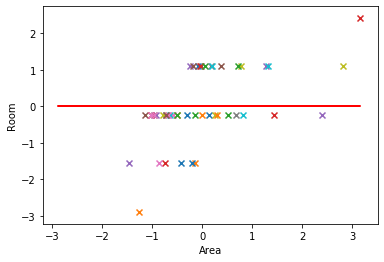

In [287]:
#plot data
plt.ylabel('Room') 
plt.xlabel('Area')
plt.plot(x, np.dot(x, theta), 'r')

for i in range(x.shape[0]):
    plt.scatter(x[i][1], x[i][2], marker='x')
plt.show()

### Before Learning cost & hypothesis

In [288]:
#calculate hypothesis & costfunction
hypothesis = np.dot(x, theta)
cost = cost_function(theta, x, price)
print("Before Learning cost :", end = ' ')
print(cost)
print("Before Learning hypothesis : ")
print(hypothesis)

Before Learning cost : 65591548106.45744
Before Learning hypothesis : 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### After Learning parameter & cost & hypothesis

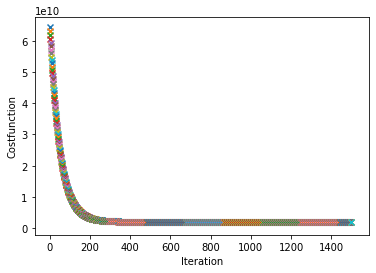

After Learning parameter : 
[[340412.56301439]
 [109370.05670466]
 [ -6500.61509507]]

After Learning cost : 2043282709.9327548

After Learning hypothesis : 
[[356255.22113087]
 [286142.87697807]
 [397432.31214125]
 [269181.06439478]
 [472264.63100939]
 [331066.1601461 ]
 [276961.4985771 ]
 [262076.53662403]
 [255538.28230819]
 [271397.02681894]
 [324806.12941817]
 [341787.59455966]
 [326485.29722472]
 [669237.10496912]
 [239957.76138535]
 [374886.3752416 ]
 [255826.3321752 ]
 [235506.18397882]
 [417871.91957338]
 [476577.09662196]
 [309374.54656838]
 [334841.83114106]
 [286699.32415388]
 [327866.58888516]
 [604708.88513267]
 [216586.98000108]
 [266389.0022366 ]
 [414960.39817945]
 [369609.95335045]
 [430401.80730834]
 [328025.35323732]
 [219945.31561418]
 [338717.30881357]
 [499957.70428533]
 [306860.70799811]
 [263467.65456357]
 [235923.51936068]
 [351515.59385733]
 [641285.46066347]
 [355688.94767595]
 [303680.78929537]
 [374896.2015207 ]
 [412029.22422731]
 [230498.15939648]
 [1907

In [259]:
#Learning
n_iter = 1500
for i in range(n_iter):
    # Put some code here
    new_theta = update_func(theta, x, price, alpha = 0.01)
    theta = new_theta
    plt.scatter(i, cost_function(theta, x, price), marker = 'x')

plt.ylabel('Costfunction')
plt.xlabel('Iteration')
plt.show()
print("After Learning parameter : ")
print(theta)
print()
print("After Learning cost :", end = ' ')
print(cost_function(theta, x, price))
print()
print("After Learning hypothesis : ")
print(np.dot(x, theta))